<a href="https://colab.research.google.com/github/Dhruv-Sharma01/ES335-Assignment/blob/main/ES335_Assignment_22110074.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Q1

How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.




##Ans 1

We will be doing m x n x (k-1) additions and m x n x k multiplications.


For one cell of output matrix we need to perform k-1 additons and k multiplications.
Total number of Output cells m x n.
Multiplying Total number of output cell with required number of additions and multiplications for one cell will give us total required multiplication and additions.


##Q2

Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?


In [ ]:

import time
matrix1=[[1,2,3,4],[2,3,4,5],[3,4,5,6]]
matrix2=[[1,2,3],[3,4,5],[4,5,6],[5,6,7]]
start=time.time()
ans=[]
mat1rows=len(matrix1)
mat2rows=len(matrix2)
mat1cols=len(matrix1[0])
mat2cols=len(matrix2[0])
for i in range(mat1rows):
  topush=[]
  for j in range(mat2cols):
    sum=0
    for k in range(mat1cols):
      sum+=matrix1[i][k]*matrix2[k][j]
    topush.append(sum)
  ans.append(topush)
end=time.time()
print(ans, "time taken by list of list ", end-start)

import numpy as np
matrix1=np.array([[[1,2,3,4],[2,3,4,5],[3,4,5,6]]])
matrix2=np.array([[1,2,3],[3,4,5],[4,5,6],[5,6,7]])
start=time.time()
ans=np.dot(matrix1,matrix2)
end=time.time()
print(ans, "time taken by numpy ", end-start)


[[39, 49, 59], [52, 66, 80], [65, 83, 101]] time taken by list of list  0.0004127025604248047
[[[ 39  49  59]
  [ 52  66  80]
  [ 65  83 101]]] time taken by numpy  0.0002334117889404297


Numpy method is almost 2x faster  because

NumPy arrays are stored in contiguous blocks of memory, unlike Python lists, which are arrays of pointers to objects. This efficient memory layout allows NumPy to take advantage of modern CPU architectures and their caches more effectively.

NumPy supports vectorized operations, meaning operations on entire arrays can be performed at once without explicit loops. This leverages highly optimized, low-level implementations in C, leading to significant performance improvements.


##Q3
Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against numpy.median routine in terms of time?

For this question the way will be to first find the length of  array and then the median index and then sort the array and the element at median index will be median for odd length of array and mean of elements at median index and median index+1 would be median for even length of array.
For sorting I have used quick sort

In [ ]:
def find_median_mult_pass(arr):
    arr = arr.tolist()
    n = len(arr)
    for i in range(((n + 1) // 2)-1):
        max_val = max(arr)
        arr.remove(max_val)
    return max(arr)
def partition(arr, low, high):
    pivot = arr[high]
    i = low
    for j in range(low, high):
        if arr[j] <= pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1
    arr[i], arr[high] = arr[high], arr[i]
    return i
def quickselect(arr, low, high, k):
    if low == high:
        return arr[low]

    pivot_index = partition(arr, low, high)

    if k == pivot_index:
        return arr[k]
    elif k < pivot_index:
        return quickselect(arr, low, pivot_index - 1, k)
    else:
        return quickselect(arr, pivot_index + 1, high, k)

def find_median_quickselect(arr):
    n = len(arr)
    return quickselect(arr, 0, n - 1, n // 2)
import numpy as np
import time
arr = np.random.randint(0, 100000, 9)
print(sorted(arr))
start = time.time()
median_mult_pass = find_median_mult_pass(arr)
end = time.time()
print(f"Multi-pass median: {median_mult_pass}, Time taken: {end - start:.5f} seconds")
start = time.time()
median_quickselect = find_median_quickselect(arr.tolist())
end = time.time()
print(f"Quickselect median: {median_quickselect}, Time taken: {end - start:.5f} seconds")
start = time.time()
median_numpy = np.median(arr)
end = time.time()
print(f"NumPy median: {median_numpy}, Time taken: {end - start:.5f} seconds")


[10387, 11827, 11844, 13397, 28999, 46445, 47755, 85626, 86530]
Multi-pass median: 28999, Time taken: 0.00008 seconds
Quickselect median: 28999, Time taken: 0.00006 seconds
NumPy median: 28999.0, Time taken: 0.00028 seconds


##Q4
What is the gradient of the following function with respect to x and y?


### Gradient Calculation

Given the function:
$[ f(x, y) = x^2 y + y^3 \sin(x) ]$

we need to find the partial derivatives with respect to \( x \) and \( y \).

### Partial Derivative with Respect to \( x \)

$[ \frac{\partial f}{\partial x} = \frac{\partial}{\partial x} \left( x^2 y + y^3 \sin(x) \right) ]$

1.  $( x^2 y )$ with respect to \( x \):
$[ \frac{\partial}{\partial x} (x^2 y) = 2x y ]$

2.  $( y^3 \sin(x) )$ with respect to \( x \):
$[ \frac{\partial}{\partial x} (y^3 \sin(x)) = y^3 \cos(x) ]$

### Partial Derivative with Respect to \( y \)

$[ \frac{\partial f}{\partial y} = \frac{\partial}{\partial y} \left( x^2 y + y^3 \sin(x) \right) ]$

1.  $( x^2 y )$ with respect to \( y \):
$[ \frac{\partial}{\partial y} (x^2 y) = x^2 ]$

2.  $( y^3 \sin(x) )$ with respect to \( y \):
$[ \frac{\partial}{\partial y} (y^3 \sin(x)) = 3y^2 \sin(x) $]


### Gradient Vector


$[ \nabla f(x, y) = \left( 2x y + y^3 \cos(x), x^2 + 3y^2 \sin(x) \right) ]$



###Using JAX

In [ ]:
import jax
import jax.numpy as jnp
import numpy as np
def f(x, y):
    return x**2 * y + y**3 * jnp.sin(x)
grad_f = jax.grad(f, argnums=(0, 1))
test_values = [(1.0, 2.0), (0.5, -1.5), (2.0, 3.0), (-1.0, 0.5)]
def analytical_grad(x, y):
    df_dx = 2 * x * y + y**3 * np.cos(x)
    df_dy = x**2 + 3 * y**2 * np.sin(x)
    return df_dx, df_dy
for x, y in test_values:
    jax_grad = grad_f(x, y)
    analytical_grad_values = analytical_grad(x, y)

    print(f"Test values: x = {x}, y = {y}")
    print(f"JAX gradient: df/dx = {jax_grad[0]}, df/dy = {jax_grad[1]}")
    print(f"Analytical gradient: df/dx = {analytical_grad_values[0]}, df/dy = {analytical_grad_values[1]}")
    print()


Test values: x = 1.0, y = 2.0
JAX gradient: df/dx = 8.322418212890625, df/dy = 11.097651481628418
Analytical gradient: df/dx = 8.322418446945118, df/dy = 11.097651817694757

Test values: x = 0.5, y = -1.5
JAX gradient: df/dx = -4.461841106414795, df/dy = 3.4861223697662354
Analytical gradient: df/dx = -4.461841146380008, df/dy = 3.48612238557837

Test values: x = 2.0, y = 3.0
JAX gradient: df/dx = 0.7640352249145508, df/dy = 28.551029205322266
Analytical gradient: df/dx = 0.7640354132271554, df/dy = 28.551030524293406

Test values: x = -1.0, y = 0.5
JAX gradient: df/dx = -0.932462215423584, df/dy = 0.3688967823982239
Analytical gradient: df/dx = -0.9324622117664825, df/dy = 0.3688967613940777



###Using Sympy

In [ ]:
import sympy as sp

x, y = sp.symbols('x y')

f = x**2 * y + y**3 * sp.sin(x)
df_dx = sp.diff(f, x)
df_dy = sp.diff(f, y)
df_dx, df_dy


(2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x))

##Q7
Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:

2022
Branch 1
Roll Number: 1, Name: N, Marks:
Maths: 100, English: 70 …
Branch 2
2023
Branch 1
Branch 2
2024
Branch 1
Branch 2
2025
Branch 1
Branch 2

In [ ]:
students = {
    2022: {
        "Branch1": [
            {
                "Roll No": 1,
                "Name": "Dhruv",
                "Marks": {
                    "Maths": 100,
                    "Science": 100
                }
            },
            {
                "Roll No": 2,
                "Name": "Dhruv",
                "Marks": {
                    "Maths": 100,
                    "Science": 100
                }
            }
        ],
        "Branch2": [
            {
                "Roll No": 3,
                "Name": "Dhruv",
                "Marks": {
                    "Maths": 100,
                    "Science": 100
                }
            },
            {
                "Roll No": 4,
                "Name": "Dhruv",
                "Marks": {
                    "Maths": 100,
                    "Science": 100
                }
            }
        ]
    },
    2023: {
        "Branch1": [
            {
                "Roll No": 5,
                "Name": "Dhruv",
                "Marks": {
                    "Maths": 100,
                    "Science": 100
                }
            },
            {
                "Roll No": 6,
                "Name": "Dhruv",
                "Marks": {
                    "Maths": 100,
                    "Science": 100
                }
            }
        ],
        "Branch2": [
            {
                "Roll No": 7,
                "Name": "Dhruv",
                "Marks": {
                    "Maths": 100,
                    "Science": 100
                }
            },
            {
                "Roll No": 8,
                "Name": "Dhruv",
                "Marks": {
                    "Maths": 100,
                    "Science": 100
                }
            }
        ]
    },
    2024: {
        "Branch1": [
            {
                "Roll No": 9,
                "Name": "Dhruv",
                "Marks": {
                    "Maths": 100,
                    "Science": 100
                }
            }
        ],
        "Branch2": [
            {
                "Roll No": 10,
                "Name": "Dhruv",
                "Marks": {
                    "Maths": 100,
                    "Science": 100
                }
            }
        ]
    }
}

print(students)

{2022: {'Branch1': [{'Roll No': 1, 'Name': 'Dhruv', 'Marks': {'Maths': 100, 'Science': 100}}, {'Roll No': 2, 'Name': 'Dhruv', 'Marks': {'Maths': 100, 'Science': 100}}], 'Branch2': [{'Roll No': 3, 'Name': 'Dhruv', 'Marks': {'Maths': 100, 'Science': 100}}, {'Roll No': 4, 'Name': 'Dhruv', 'Marks': {'Maths': 100, 'Science': 100}}]}, 2023: {'Branch1': [{'Roll No': 5, 'Name': 'Dhruv', 'Marks': {'Maths': 100, 'Science': 100}}, {'Roll No': 6, 'Name': 'Dhruv', 'Marks': {'Maths': 100, 'Science': 100}}], 'Branch2': [{'Roll No': 7, 'Name': 'Dhruv', 'Marks': {'Maths': 100, 'Science': 100}}, {'Roll No': 8, 'Name': 'Dhruv', 'Marks': {'Maths': 100, 'Science': 100}}]}, 2024: {'Branch1': [{'Roll No': 9, 'Name': 'Dhruv', 'Marks': {'Maths': 100, 'Science': 100}}], 'Branch2': [{'Roll No': 10, 'Name': 'Dhruv', 'Marks': {'Maths': 100, 'Science': 100}}]}}


##Q8

Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [ ]:
!pip install dataclasses

In [ ]:
class Student:
    def __init__(self, roll_no, name, marks):
        self.roll_no = roll_no
        self.name = name
        self.marks = marks
    def __repr__(self):
        return f"Student(Roll No: {self.roll_no}, Name: '{self.name}', Marks: {self.marks})"
class Branch:
    def __init__(self, branch_name):
        self.branch_name = branch_name
        self.students = []
    def add_student(self, student):
        self.students.append(student)
    def __repr__(self):
        return f"Branch(Name: '{self.branch_name}', Students: {self.students})"
class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year(Year: {self.year}, Branches: {self.branches})"
class Database:
    def __init__(self):
        self.years = []
    def add_year(self, year):
        self.years.append(year)
    def __repr__(self):
        return f"Database(Years: {self.years})"

db = Database()

year_2022 = Year(2022)
branch_2022_1 = Branch("Branch1")
branch_2022_2 = Branch("Branch2")

branch_2022_1.add_student(Student(1, "Dhruv", {"Maths": 100, "Science": 100}))
branch_2022_1.add_student(Student(2, "Dhruv", {"Maths": 90, "Science": 95}))

branch_2022_2.add_student(Student(3, "Dhruv", {"Maths": 85, "Science": 80}))
branch_2022_2.add_student(Student(4, "Dhruv", {"Maths": 88, "Science": 92}))

year_2022.add_branch(branch_2022_1)
year_2022.add_branch(branch_2022_2)

db.add_year(year_2022)

print(db)


Database(Years: [Year(Year: 2022, Branches: [Branch(Name: 'Branch1', Students: [Student(Roll No: 1, Name: 'Dhruv', Marks: {'Maths': 100, 'Science': 100}), Student(Roll No: 2, Name: 'Dhruv', Marks: {'Maths': 90, 'Science': 95})]), Branch(Name: 'Branch2', Students: [Student(Roll No: 3, Name: 'Dhruv', Marks: {'Maths': 85, 'Science': 80}), Student(Roll No: 4, Name: 'Dhruv', Marks: {'Maths': 88, 'Science': 92})])])])


## Q9


Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

In [ ]:
!pip install numpy

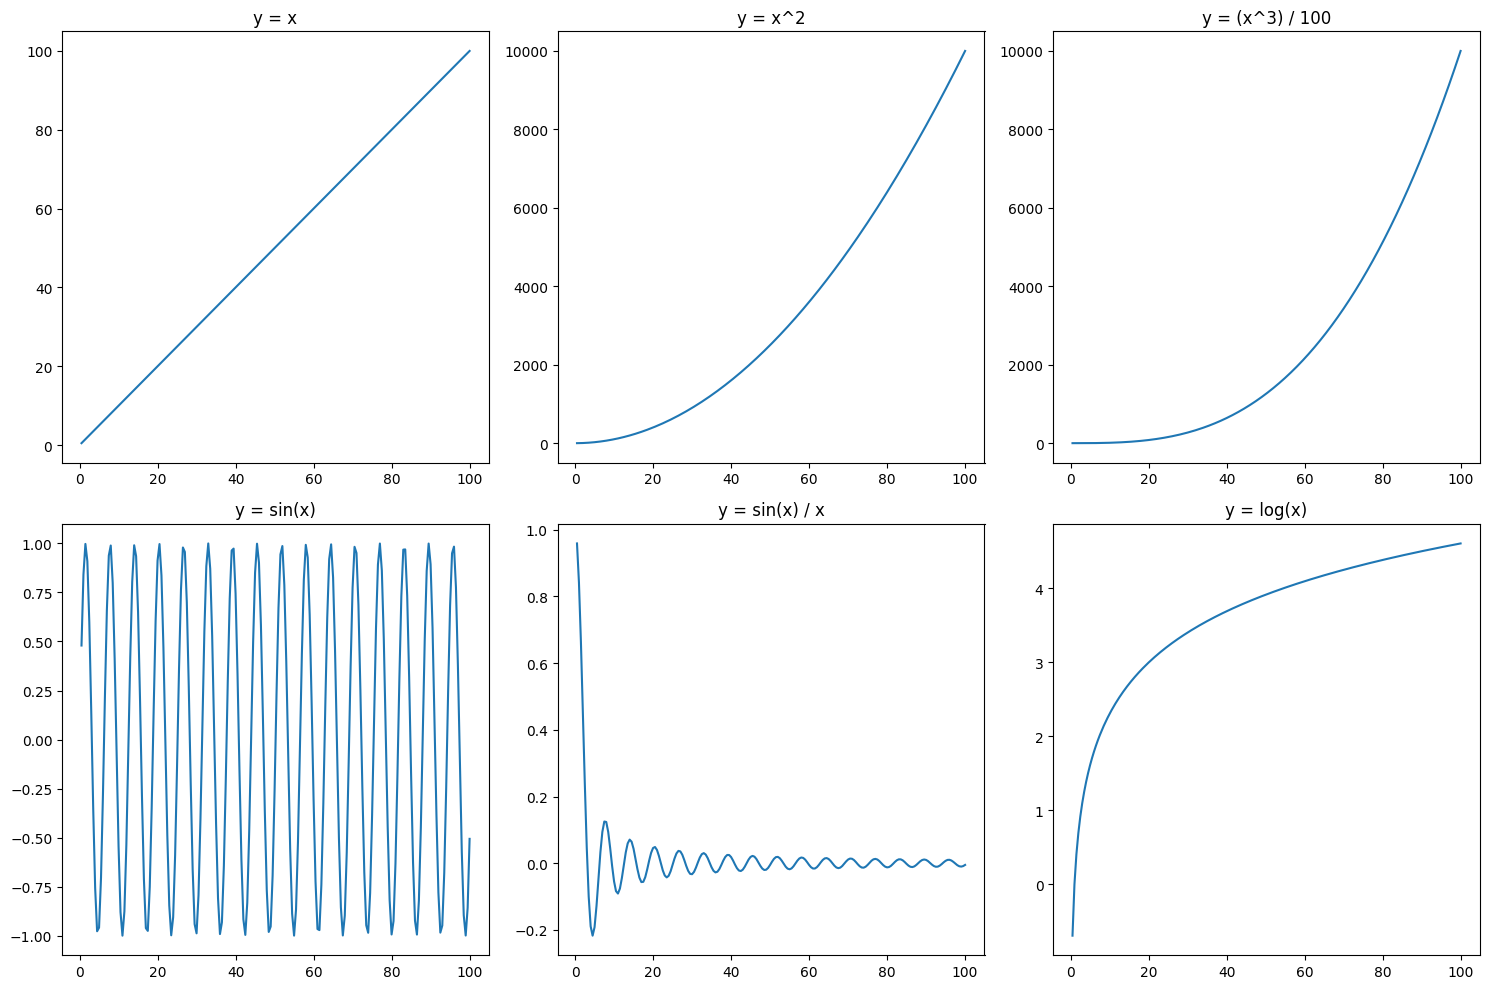

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(0.5, 100, 200)
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
y = x
plt.plot(x, y)
plt.title('y = x')
plt.subplot(2, 3, 2)
y = x**2
plt.plot(x, y)
plt.title('y = x^2')
plt.subplot(2, 3, 3)
y = (x**3) / 100
plt.plot(x, y)
plt.title('y = (x^3) / 100')
plt.subplot(2, 3, 4)
y = np.sin(x)
plt.plot(x, y)
plt.title('y = sin(x)')
plt.subplot(2, 3, 5)
y = np.sin(x) / x
plt.plot(x, y)
plt.title('y = sin(x) / x')

plt.subplot(2, 3, 6)
y = np.log(x)
plt.plot(x, y)
plt.title('y = log(x)')

plt.tight_layout()

plt.show()


##Q 10
Using numpy generate a matrix of size 20X5 containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [ ]:
import pandas as pd
matrix=np.random.uniform(1,2,size=(20,5))
matrix
df=pd.DataFrame(matrix,columns=["a","b","c","d","e"])
df
std_devs = df.std()
max_std_col = std_devs.idxmax()
print("Maximum std dev col",max_std_col)
row_means = df.mean(axis=1)
min_mean_row = row_means.idxmin()
print("Minimum std dev row",min_mean_row)

Maximum std dev col d
Minimum std dev row 17


##Q11
Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [ ]:
df['f']=df['a']+df['b']+df['c']+df['d']+df['e']
df['g']=df['f'].apply(lambda x:"LT8" if x<8 else "GT8" )
print(df)
print((df['g'].value_counts("LT8"))*df['g'].count())

           a         b         c         d         e         f    g
0   1.804537  1.701119  1.399429  1.914584  1.622778  8.442446  GT8
1   1.666109  1.844681  1.407654  1.033426  1.518295  7.470164  LT8
2   1.698475  1.286724  1.521378  1.206123  1.360409  7.073109  LT8
3   1.087610  1.393022  1.701209  1.252734  1.348260  6.782835  LT8
4   1.060992  1.023104  1.296532  1.420524  1.830735  6.631887  LT8
5   1.997539  1.497765  1.682523  1.356109  1.710568  8.244504  GT8
6   1.090136  1.384037  1.623322  1.739745  1.914302  7.751542  LT8
7   1.105856  1.934702  1.132446  1.188940  1.254936  6.616879  LT8
8   1.062136  1.325811  1.986328  1.757271  1.470384  7.601929  LT8
9   1.739776  1.157232  1.029208  1.328713  1.695842  6.950771  LT8
10  1.422546  1.565666  1.878444  1.222592  1.153771  7.243019  LT8
11  1.432105  1.622799  1.549080  1.132839  1.545657  7.282481  LT8
12  1.114752  1.402855  1.448835  1.847153  1.774556  7.588150  LT8
13  1.208200  1.831311  1.377654  1.826886  1.42

##Q12
Write a small piece of code to explain broadcasting in numpy.

In [ ]:
import numpy as np
x=np.array([[1,2],[3,4]])
y=np.array([1,2])
print(x+y)

[[2 4]
 [4 6]]


Through the above code we can see that values of y are broadcasted over x means the 1,2 column values are spread in both columns and the resultant matrix is 2x2 only and the columns are added by [1,2]

###Q13

Write a function to compute the argmin of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the np.argmin function to verify your solution.

In [ ]:
def findargmin(l):
  minelei=0
  iterator=0
  for x in l:
    if(x<l[minelei]):
      minelei=iterator
    iterator+=1
  return minelei
l=np.random.randint(1,100,100)
print("l:",l)
print("Argmin by my function:", findargmin(l))
print("Argmin by np.argmin:",np.argmin(l))

l: [ 2 92 38 38 47 68 20 36 52 77 95 20 37 44 81 59  4 73 76 33 54 83 40  3
 72 20 69 90 12 79 48 30 32 99 35 14 90  6 88 82 47 19 19 99 83 99 44 56
 58 19 25 45 70 30 97  2  1 95 49 43 30  9 19 35 84 40 71 99 40 50 31 65
 35 16 98 83 81  1  6 50 37  2 14  3 92 26 38 16 14 18 97 46 18 37 98 83
 52 81 22 14]
Argmin by my function: 56
Argmin by np.argmin: 56
